In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#load the dataset
file_path=r"C:\Users\INZAMUL KHAN\Downloads\Dataset .csv"
df=pd.read_csv(file_path)

In [45]:
##data cleaning 
#remove dulplicate
df_cleaned=df.drop_duplicates()

In [46]:
df_cleaned = df_cleaned.dropna(subset=['Cuisines'])
# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

In [47]:
df_cleaned = df_cleaned.copy()  # Ensure changes apply to a new DataFrame
df_cleaned['restaurant_id'] = df_cleaned['restaurant_id'].astype('object').astype(str)  # Convert safely
df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')  # Convert to numeric safely


In [48]:
#save the clneaned dataset
df_cleaned.to_csv("Cleaned_Dataset_lv3_task1.csv", index=False)
print("Data cleaning completed.Cleaned dataset saved as'Cleaned_Dataset_lv3_task1.csv'.")

Data cleaning completed.Cleaned dataset saved as'Cleaned_Dataset_lv3_task1.csv'.


In [49]:
#Identify the most common rating
common_ratings=df_cleaned['aggregate_rating'].value_counts().reset_index()
common_ratings.columns = ['Rating','Count']

In [50]:
#find the highest and lowest vote
highest_voted = df_cleaned.nlargest(5,'votes')[['restaurant_name','votes','aggregate_rating']]
lowest_voted =df_cleaned.nsmallest(5,'votes')[['restaurant_name','votes','aggregate_rating']]

In [51]:
#Analyze correlation between votes and ratings
correlation = df_cleaned[['votes','aggregate_rating']].corr().iloc[0,1]

In [52]:
#save results to csv
results_df = pd.DataFrame({
    "Metric":["Most Common Rating","Highest Votes Restaurant","Lowest Votes Restaurant","Votes-Rating Correlation "],
    "Value":[common_ratings.iloc[0,0], highest_voted.iloc[0,0],lowest_voted.iloc[0,0], correlation]
})
results_df.to_csv("Review_Analysis_Results.csv",index=False)
print("Analysis completed.Results saved as 'Review_Anaysis_results.csv'.")

Analysis completed.Results saved as 'Review_Anaysis_results.csv'.


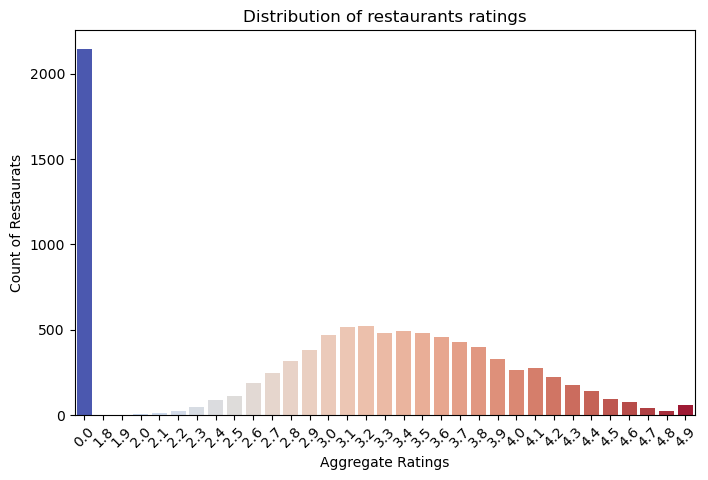

In [53]:
#Visulaization -destribution of rating
plt.figure(figsize=(8,5))
sns.barplot(x=common_ratings['Rating'],y=common_ratings['Count'],
             hue=common_ratings['Rating'],
            palette="coolwarm",
           legend = False)
plt.xlabel("Aggregate Ratings")
plt.ylabel("Count of Restaurats")
plt.title("Distribution of restaurants ratings")
plt.xticks(rotation=45)
plt.show()

In [54]:
common_ratings.head()

,Rating,Count
0,0.0,2148
1,3.2,522
2,3.1,519
3,3.4,495
4,3.3,483


In [55]:
highest_voted

,restaurant_name,votes,aggregate_rating
728,Toit,10934,4.8
735,Truffles,9667,4.7
3994,Hauz Khas Social,7931,4.3
2412,Peter Cat,7574,4.3
739,AB's - Absolute Barbecues,6907,4.6


In [56]:
lowest_voted

,restaurant_name,votes,aggregate_rating
69,Cantinho da Gula,0,0.0
874,The Chaiwalas,0,0.0
879,Fusion Food Corner,0,0.0
880,Punjabi Rasoi,0,0.0
887,Baskin Robbin,0,0.0


In [57]:
correlation

0.31347418032500096

In [59]:
#save the most common ratings
common_ratings.to_csv("Common_Ratings_lv3task1.csv",index=False)
#save the highest voted restaurarant
highest_voted.to_csv("Highest_Voted_Restaurants_lv3task1.csv",index=False)
#save the lowest
lowest_voted.to_csv("Lowest_Voted_Restaurants_lv3task1.csv",index=False)
# correlation
with open("Votes_Rating_Correlation.txt", "w") as f:
    f.write(f"Correlation between votes and ratings: {correlation:.2f}")

# save the chart as a PDF file
plt.savefig("Rating_Distribution_lv3_tsk1.pdf ", format="pdf", bbox_inches="tight")


print("all resutls have been saved succesfully!")

all resutls have been saved succesfully!


<Figure size 640x480 with 0 Axes>